# Convolutional Neural Network : CIFAR-10
---
#### 실습목표
1. CNN의 기본 아이디어를 안다.
2. CNN의 구조를 그리고, 코드로 옮길 수 있다.

## Real Game : CNN on CIFAR-10

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [2]:
'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

### Data Loading

In [3]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [5]:
labels = {0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

print(labels)

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


id = 6949
다음 그림은 Airplane 입니다.


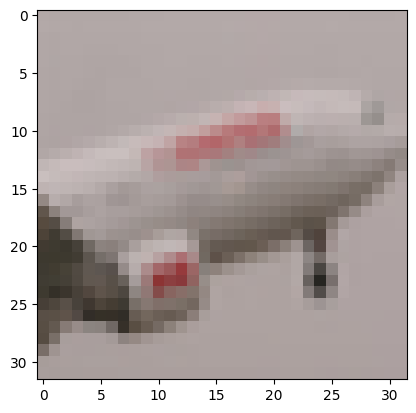

In [6]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id][0]]} 입니다.')
plt.imshow(test_x[id])
plt.show()

### X : 표준화 Scaling (standardization)

$$ X_{scaled} = {{x_{original} - mean(x)}\over{std(x)} } $$

* 한꺼번에 Standardization 적용

In [7]:
train_x_s = (train_x - train_x.mean()) / train_x.std()
test_x_s = (test_x - test_x.mean()) / test_x.std()

* 채널별로 Standardization 적용

### Y : One-Hot Encoding

In [8]:
from tensorflow.keras.utils import to_categorical
train_y_h = to_categorical(train_y)
test_y_h = to_categorical(test_y)

### Modeling

- EarlyStopping 의 옵션도 조절해보자.
- .fit( )
- .predict( )
---

- **자유롭게 먼저 해보는 것을 추천**

---

- **구조를 따라서 코딩을 한다면**
    0. Functional, Sequential 중 택일
    1. 인풋레이어
    2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    3. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    4. BatchNormalization
    5. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    6. DropOut : 25% 비활성화
    7. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    8. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    9. BatchNormalization
    10. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    11. DropOut : 25% 비활성화
    12. Flatten( )
    13. Fully Connected Layer : 노드 1024개
    14. BatchNormalization
    15. DropOut : 35% 비활성화
    16. 아웃풋레이어



In [14]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_loss',
                   min_delta = 0,
                   patience = 5,
                   verbose = 1,
                   restore_best_weights = True)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from keras.backend import clear_session
from keras.optimizers import Adam

clear_session()

model = Sequential([Conv2D(32, kernel_size = (3,3), input_shape = (32, 32, 3), padding = 'same', strides = 1, activation = 'relu'),
                    Conv2D(32, kernel_size = (3,3), padding = 'same', strides = 1, activation = 'relu'),
                    BatchNormalization(),
                    MaxPooling2D(pool_size = (2,2), strides = 2),
                    Dropout(rate = 0.25),
                    Conv2D(64, kernel_size = (3,3), input_shape = (32, 32, 3), padding = 'same', strides = 1, activation = 'relu'),
                    Conv2D(64, kernel_size = (3,3), padding = 'same', strides = 1, activation = 'relu'),
                    BatchNormalization(),
                    MaxPooling2D(pool_size = (2,2), strides = 2),
                    Dropout(rate = 0.25),
                    Flatten(),
                    Dense(1024, activation = 'relu'),
                    BatchNormalization(),
                    Dropout(rate = 0.35),
                    Dense(10, activation = 'softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        1

In [15]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy')
model.fit(train_x_s, train_y_h, epochs = 50, validation_split=0.2, callbacks = [es])

Epoch 1/50
1250/1250 [==============================] - 12s 8ms/step - loss: 0.5392 - val_loss: 0.7058
Epoch 2/50
1250/1250 [==============================] - 10s 8ms/step - loss: 0.4662 - val_loss: 0.6673
Epoch 3/50
1250/1250 [==============================] - 8s 7ms/step - loss: 0.4486 - val_loss: 0.6450
Epoch 4/50
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3939 - val_loss: 0.7656
Epoch 5/50
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3935 - val_loss: 0.6493
Epoch 6/50
1250/1250 [==============================] - 9s 7ms/step - loss: 0.3699 - val_loss: 0.6751
Epoch 7/50
1250/1250 [==============================] - 8s 7ms/step - loss: 0.3304 - val_loss: 0.6664
Epoch 8/50
1250/1250 [==============================] - 10s 8ms/step - loss: 0.3007 - val_loss: 0.6512
Epoch 8: early stopping


### Visualization

In [16]:
# 원핫 인코딩 해제 : 카테고리 중 가장 높은 값
train_y = train_y.argmax(axis=1)
test_y = test_y.argmax(axis=1)

AxisError: ignored

In [17]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y, single_pred_train)
logi_test_accuracy = accuracy_score(test_y, single_pred_test)

print('CNN')
print(f'트레이닝 정확도 : {logi_train_accuracy*100:.2f}%')
print(f'테스트 정확도 : {logi_test_accuracy*100:.2f}%')

313/313 [==============================] - 1s 2ms/step
CNN
트레이닝 정확도 : 38.51%
테스트 정확도 : 39.51%


In [ ]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_pred_test[id]]}')

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()

In [ ]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]


print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_pred_test[id]]}')

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y[id] == single_pred_test[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()